0. Zadání úkolu: 
Najděte si měsíční časové řady indexu spotřebitelských cen (vyjádřenou v podobě bázického indexu se stálým základem) a nějaké krátkodobé nominální úrokové míry vaší oblíbené ekonomiky za dostatečně dlouhé období (cca. 10 let, tj. 120 měsíčních dat, nicméně řady mohou být i delší). Snažte se v případě indexu spotřebitelských cen najít sezónně očištěnou řadu. V rámci zpracování úkolu uveďte, jakou ekonomiku a časové období jste si vybrali. Výsledky svého řešení níže uvedených úkolů a své odpovědi na položené otázky komentujte a shrňte v rámci doprovodného komentovaného dokumentu.

In [ ]:
// Pozn.: Takže řady mají být rovnou dvě, pro porovnání různých vlastností

První z časových řad je:
Měsíční bazická data spotřebitelského indexu

Časové rozpětí indexu je 23 let (277 měsíců), konkrétně od ledna 2000 do ledna 2023. Index tedy zahrnuje vliv ekonomického růstu z počátku tisíciletí, finanční krize, epidemii covid i ruskou invazi na Ukrajinu a vysokou inflaci. 

Zdroj:
https://vdb.czso.cz/vdbvo2/faces/cs/index.jsf?page=vystup-objekt-parametry&z=T&f=TABULKA&sp=A&skupId=4069&katalog=31779&pvo=CEN084A&pvo=CEN084A&evo=v2677_!_CEN-SPO-BAZIC2015-HSM_1

Soubor je zároveň přiložen v odevzdávárně (i.csv).

In [15]:
# Načtení spotřebitelského indexu do objektu "i"
i <- readxl::read_xls(paste0(getwd(),"/i.xls"))

# Dimenze spotřebitelského indexu
dim(i)

[1] 277   2

In [17]:
# Převedeme do formátu časové řady
i <- i$index
i <- ts(i, frequency=12, start=c(2000,1))
i

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,73.0,73.1,73.1,73.0,73.2,73.7,74.3,74.4,74.2,74.4,74.5,74.6
2001,76.0,76.0,76.1,76.4,76.9,77.6,78.3,78.2,77.6,77.6,77.4,77.5
2002,78.6,78.6,78.6,78.6,78.5,78.3,78.5,78.4,77.9,77.7,77.6,77.6
2003,78.0,78.2,78.1,78.3,78.3,78.3,78.3,78.2,77.9,78.0,78.2,78.4
2004,79.6,79.7,79.8,79.9,80.3,80.5,80.7,80.7,80.1,80.5,80.4,80.3
2005,80.8,80.8,80.8,81.0,81.0,81.5,81.8,81.8,81.7,82.4,82.1,81.9
2006,82.8,82.8,82.7,82.9,83.3,83.4,83.7,83.9,83.5,83.1,82.9,83.1
2007,83.9,84.1,84.4,85.0,85.3,85.6,85.9,86.1,85.9,86.4,87.2,87.6
2008,90.5,90.6,90.4,90.8,91.1,91.3,91.7,91.5,91.3,91.4,90.8,90.5
2009,91.8,91.8,92.0,91.9,92.0,92.0,91.6,91.5,91.0,90.9,90.9,91.0


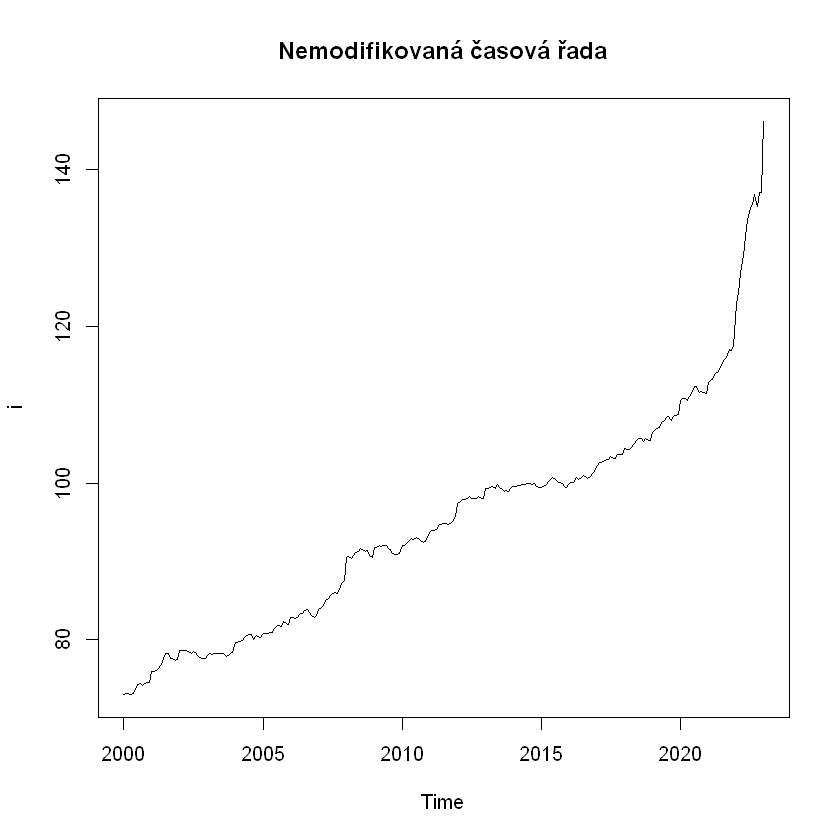

In [18]:
# Vykreslení indexu bez úprav

plot.ts(i, main="Nemodifikovaná časová řada", type= "l")

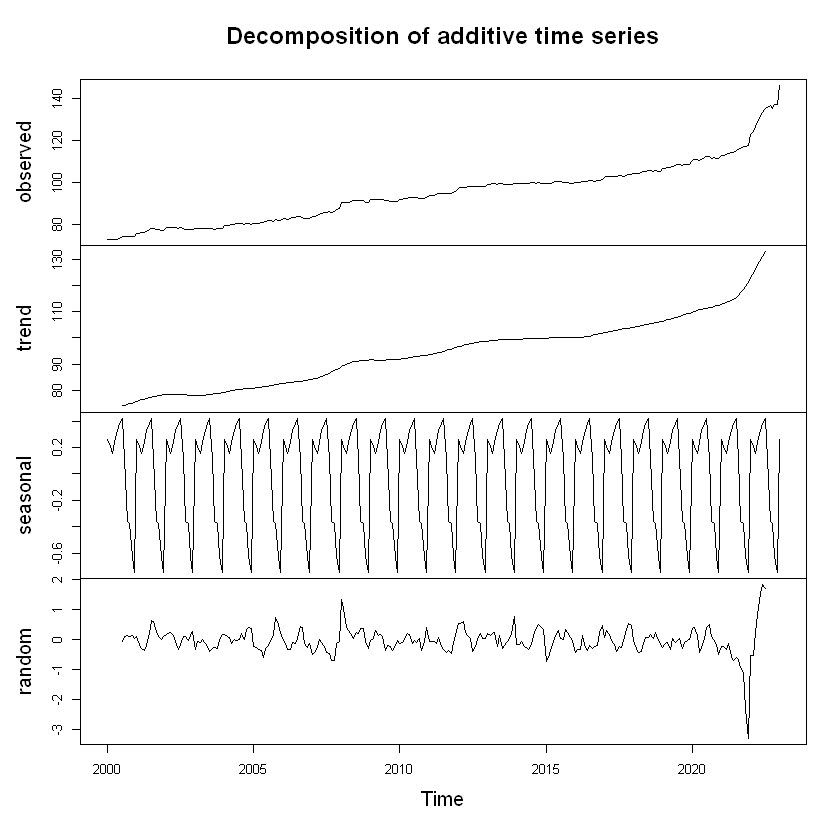

In [19]:
# Dekompozice časové řady

plot(decompose(i))

In [ ]:
Index bude nutné nejprve očistit od sezónní složky.

1. Transformujte získané časové řady do podoby temp růstu (diference logaritmů) popř. diferencí (dle typu modelované řady). Která z nabízených transformací je pro jednotlivé řady vhodná či nevhodná a proč? Graficky prezentujte vývoj použitých časových řad (původních i vhodně transformovaných).

In [20]:
# Nejdříve odečteme sezónní složku, v opačném případě nás funkce arima() upozorní, že časová řada není stacionární

deco <- decompose(i)  # Aditivní časovou řadu rozložíme na složky
i <- i - deco$seasonal    # Odečteme sezónnost od celku

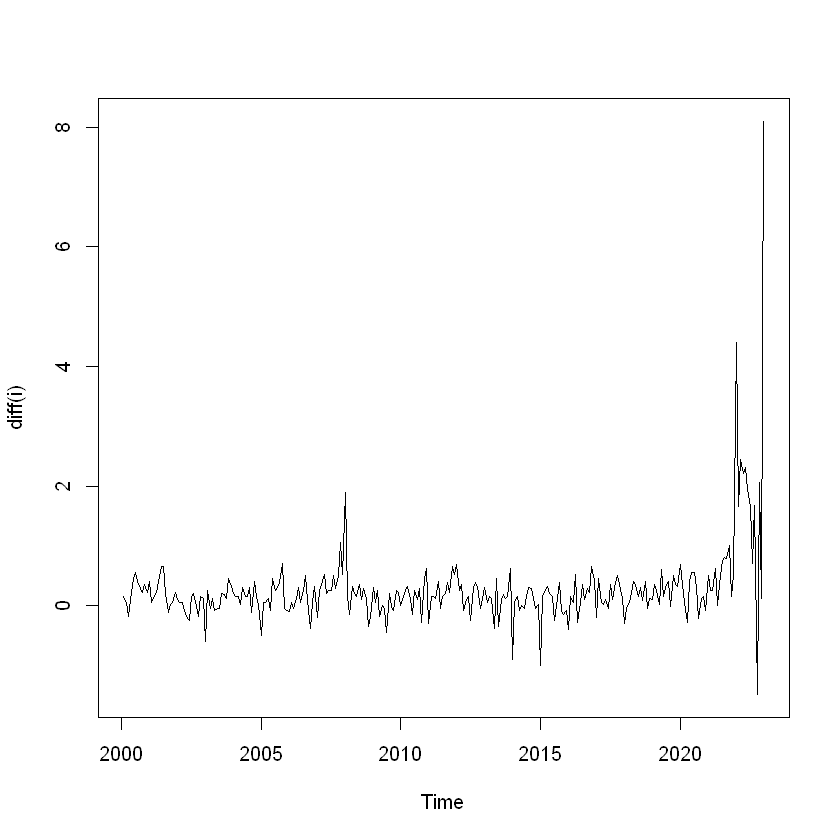

In [10]:
plot(diff(i))

In [21]:
# Načteme knihovnu forecast
library(forecast)

# Diferencování řady pro dosažení stacionarity
diff_i <- diff(log(i))

2. Namodelujte zvolené řady alternativními ARMA modely (minimálně šesti), a to pro celé zkoumané období. Zdůvodněte volbu těchto modelů (komentujte v této souvislosti např. ACF a PACF zvolené řady).

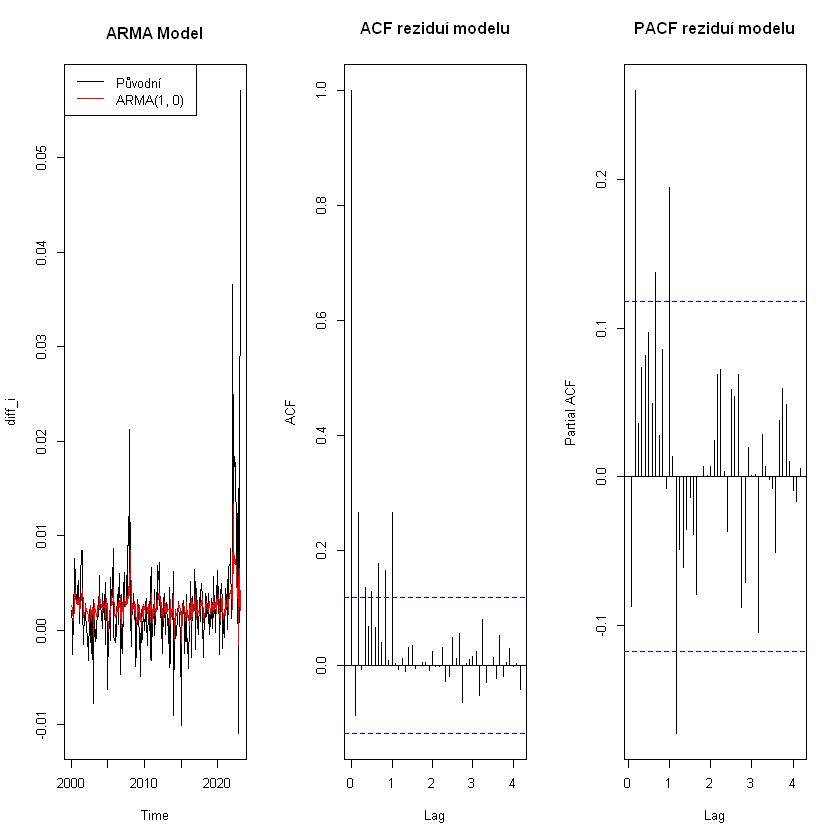

In [49]:
model_10 <- Arima(diff_i, order = c(1, 0, 0))  # AR(1)

par(mfrow = c(1, 3))

# Vytvoř graf
plot(diff_i, type = "l", main = "ARMA Model")
lines(fitted(model_10), col = "red")
legend("topleft", legend = c("Původní", "ARMA(1, 0)"), col = c("black", "red"), lty = c(1, 1))

acf(residuals(model_10), main = "ACF reziduí modelu", lag=50)

pacf(residuals(model_10), main = "PACF reziduí modelu", lag=50)

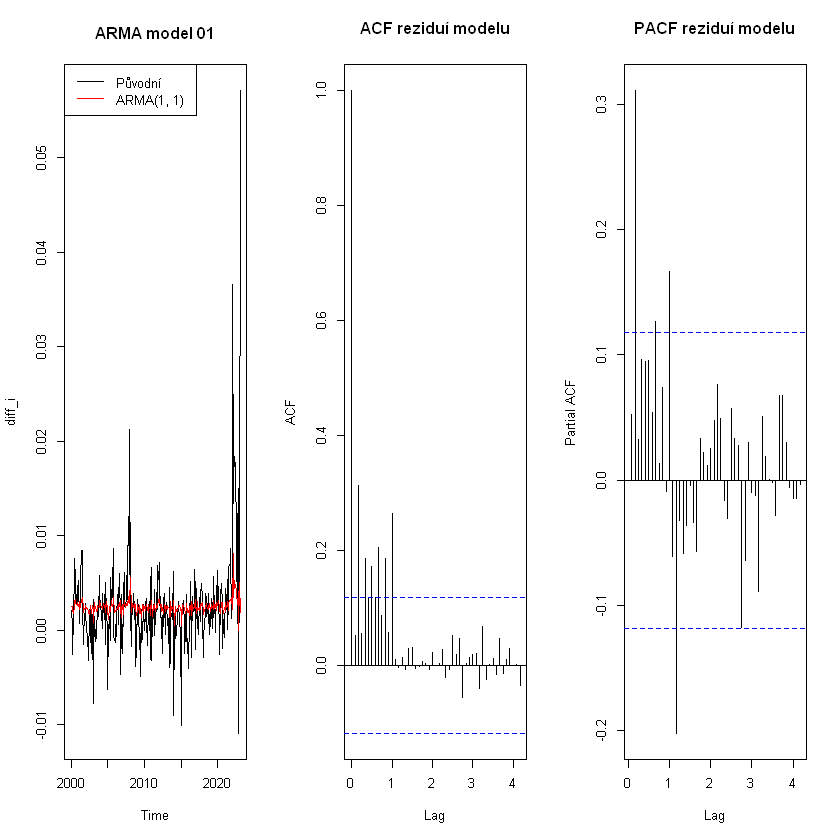

In [50]:
model_01 <- arima(diff_i, order = c(0, 0, 1))  # MA(1)

par(mfrow = c(1, 3))

# Vytvoříme graf
plot(diff_i, type = "l", main = "ARMA model 01")
lines(fitted(model_01), col = "red")
legend("topleft", legend = c("Původní", "ARMA(1, 1)"), col = c("black", "red"), lty = c(1, 1))

acf(residuals(model_01), main = "ACF reziduí modelu", lag=50)

pacf(residuals(model_01), main = "PACF reziduí modelu", lag=50)

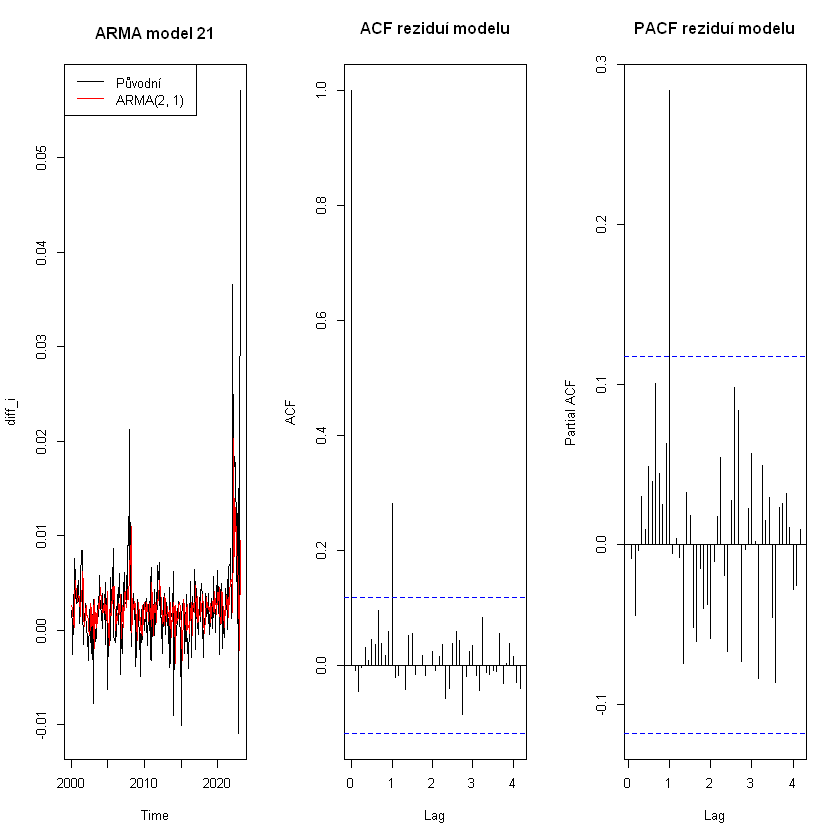

In [51]:
model_21 <- Arima(diff_i, order = c(2, 0, 1))  # ARMA(2,1)

par(mfrow = c(1, 3))

# Vytvoř graf
plot(diff_i, type = "l", main = "ARMA model 21")
lines(fitted(model_21), col = "red")
legend("topleft", legend = c("Původní", "ARMA(2, 1)"), col = c("black", "red"), lty = c(1, 1))


acf(residuals(model_21), main = "ACF reziduí modelu", lag=50)

pacf(residuals(model_21), main = "PACF reziduí modelu", lag=50)

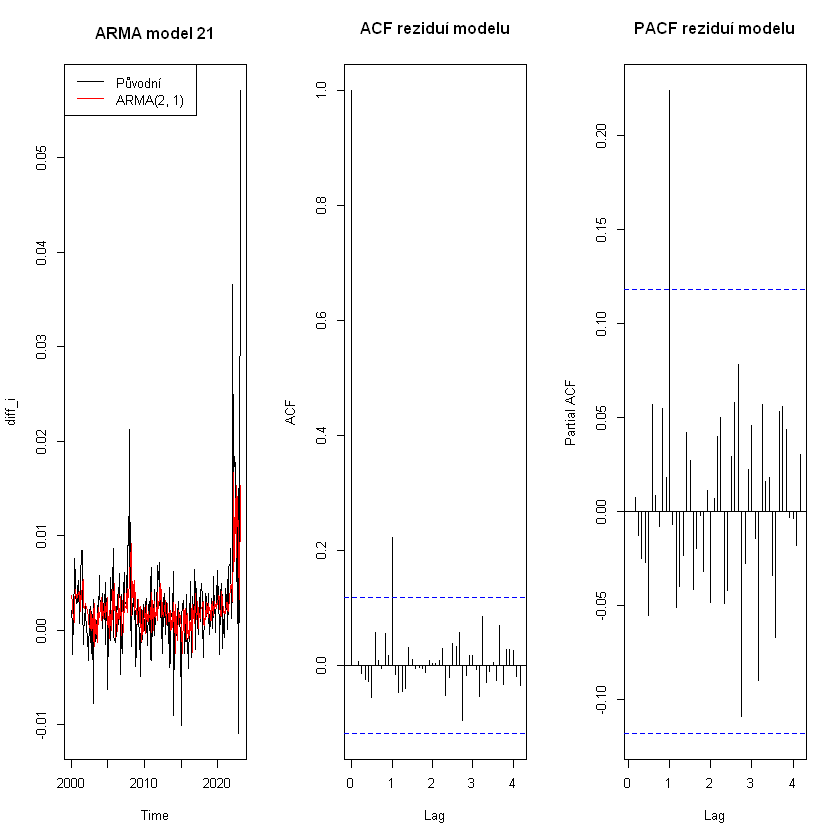

In [84]:
model <- Arima(diff_i, order = c(5, 0, 4))  # ARMA(2,1)

par(mfrow = c(1, 3))

# Vytvoř graf
plot(diff_i, type = "l", main = "ARMA model 21")
lines(fitted(model), col = "red")
legend("topleft", legend = c("Původní", "ARMA(2, 1)"), col = c("black", "red"), lty = c(1, 1))


acf(residuals(model), main = "ACF reziduí modelu", lag=50)

pacf(residuals(model), main = "PACF reziduí modelu", lag=50)

In [77]:
model_ <- Arima(diff_i, order = c(2, 0, 2))  # ARMA(2,1)

par(mfrow = c(1, 3))

# Vytvoř graf
plot(diff_i, type = "l", main = "ARMA model 21")
lines(fitted(model), col = "red")
legend("topleft", legend = c("Původní", "ARMA(2, 1)"), col = c("black", "red"), lty = c(1, 1))


acf(residuals(model), main = "ACF reziduí modelu", lag=50)

pacf(residuals(model), main = "PACF reziduí modelu", lag=50)

ERROR: Error in stats::arima(x = x, order = order, seasonal = seasonal, include.mean = include.mean, : non-stationary AR part from CSS


3. Proveďte pro jednotlivé modely potřebné diagnostické testy (hlavně tedy test autokorelace, ověření stability odhadnutého modelu), srovnejte a komentujte jejich výsledky, případně sjednejte nápravu novou specifikací modelu, pokud testy indikují nežádoucí vlastnosti všech těchto modelů. Pro přehlednost můžete prezentovat výstupy diagnostik v jedné přehledné tabulce pro všechny modely.

In [69]:
diagnostics <- data.frame(Model = c("AR(1)", "MA(1)", "ARMA(2, 1)"),
                           AIC = c(AIC(model_10), AIC(model_01), AIC(model_21)),
                           Ljung_Box_Q = c(format.pval(Box.test(residuals(model_10), lag = 10)$p.value),
                                           format.pval(Box.test(residuals(model_01), lag = 10)$p.value),
                                           format.pval(Box.test(residuals(model_21), lag = 10)$p.value)))
diagnostics

Box.test(residuals(model_21))
Box.test(residuals(model_21), lag = 10)$p.value

AIC(model_10)

Model,AIC,Ljung_Box_Q
<chr>,<dbl>,<chr>
AR(1),-2098.629,2.1894e-07
MA(1),-2089.772,1.5048e-12
"ARMA(2, 1)",-2132.584,0.89948



	Box-Pierce test

data:  residuals(model_21)
X-squared = 0.020048, df = 1, p-value = 0.8874


[1] 0.8994772

[1] -2098.629

4. Zobrazte si původní řady a řady vyrovnáných hodnot a s využitím vhodných statistik či charakteristik rozhodněte o kvalitě vyrovnání těchto řad vašimi modely. Prezentujte výsledky srovnání v přehledné tabulce. Okomentujte (a zdůvodněte), který z modelů byste ve výsledku zvolili jako nejvhodnější.

In [74]:
library(moments)

smoothed_10 <- fitted(model_10)
smoothed_01 <- fitted(model_01)
smoothed_21 <- fitted(model_21)

# Statistiky pro srovnání
r_squared <- c(cor(diff_i, smoothed_10)^2, cor(diff_i, smoothed_01)^2, cor(diff_i, smoothed_21)^2)
correlation <- c(cor(diff_i, smoothed_10), cor(diff_i, smoothed_01), cor(diff_i, smoothed_21))
skewness <- c(skewness(smoothed_10), skewness(smoothed_01), skewness(smoothed_21))
kurtosis <- c(kurtosis(smoothed_10), kurtosis(smoothed_01), kurtosis(smoothed_21))
aic <- c(AIC(model_10), AIC(model_01), AIC(model_21))
bic <- c(BIC(model_10), BIC(model_01), BIC(model_21))

# Vytvoř přehlednou tabulku s výsledky srovnání
comparison <- data.frame(Model = c("model_10", "model_01", "model_21"),
                         R_squared = r_squared,
                         Correlation = correlation,
                         Skewness = skewness,
                         Kurtosis = kurtosis,
                         AIC = aic,
                         BIC = bic)

# Zobraz přehlednou tabulku
print(comparison)

     Model  R_squared Correlation Skewness Kurtosis       AIC       BIC
1 model_10 0.06456189   0.2540903 2.395993 17.83618 -2098.629 -2087.768
2 model_01 0.03800993   0.1949613 2.299718 18.99032 -2089.772 -2078.911
3 model_21 0.18615698   0.4314591 2.490699 16.59539 -2132.584 -2114.482


Don't know how to automatically pick scale for object of type <ts>. Defaulting to continuous.


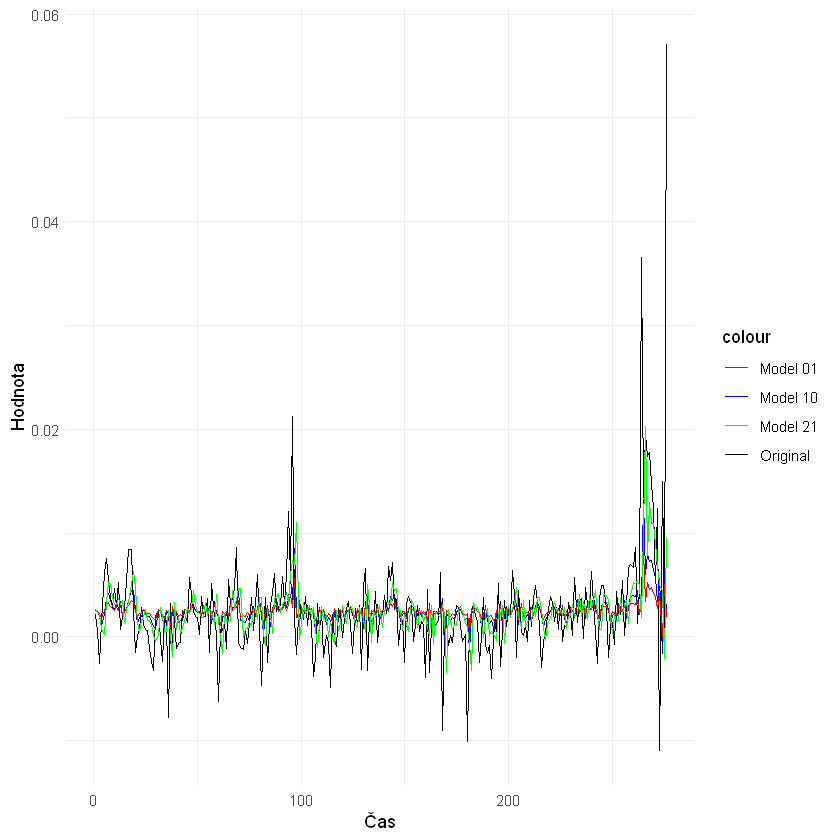

In [76]:
library(ggplot2)

data <- data.frame(Time = 1:length(diff_i),
                   Original = diff_i,
                   Model_10 = smoothed_10,
                   Model_01 = smoothed_01,
                   Model_21 = smoothed_21)

# Vykreslení grafu pomocí ggplot
ggplot(data, aes(Time)) +
  geom_line(aes(y = Original, color = "Original")) +
  geom_line(aes(y = Model_10, color = "Model 10")) +
  geom_line(aes(y = Model_01, color = "Model 01")) +
  geom_line(aes(y = Model_21, color = "Model 21")) +
  labs(x = "Čas", y = "Hodnota") +
  scale_color_manual(values = c("Original" = "black", "Model 10" = "blue", "Model 01" = "red", "Model 21" = "green")) +
  theme_minimal()

In [ ]:
Použít následující kód pro automatické nalezení nejlepšího modelu.

In [ ]:
# Vyber modelu s nejnizsim informacnim kriteriem
# Nemusime tvorit matice pro ukladani vysledku ani cyklus pro odhady
# y = casova rada
# d/D = pocet diferenci/pocet sezonnich diferenci
# max.p/d/q/P/D/Q = maximalni mozny rad dane slozky
# start.p/q/P/Q = nejnizsi mozny rad dane slozky
# stepwise = FALSE -> prochazi vsechny mozne modely, mozno pouze pri malem mnozstvi modelu, v praxi spise stepwise = TRUE
vyber_model_aic <- forecast::auto.arima( y, d = 0, D = 0, max.p = 3, max.q = 3,
                                         max.P = 0, max.Q = 0, stepwise = FALSE,
                                         max.d = 0, max.D = 0, start.p = 0,
                                         start.q = 0,
                                         ic = "aic" ) # kriterium pro volbu modelu 

vyber_model_bic <- forecast::auto.arima( y, d = 0, D = 0, max.p = 3, max.q = 3,
                                         max.P = 0, max.Q = 0, stepwise = FALSE,
                                         max.d = 0, max.D = 0, start.p = 0,
                                         start.q = 0,
                                         ic = "bic" ) # kriterium pro volbu modelu
vyber_model_aic
vyber_model_bic

5. Jak by se změnily vaše závěry a odpovědi na předchozí otázky, pokud byste pracovali s řadami meziročních změn resp. temp růstu? Zopakujte tedy předchozí postup pro takto transformované řady.

    Frekvence a časové intervaly: Meziroční změny jsou založeny na ročních intervalech, kde se měří změny mezi stejnými obdobími v různých letech. Měsíční index spotřebitelských cen se naopak vztahuje k měsíčním intervalům, kde se měří změny mezi jednotlivými měsíci.

    Úroveň agregace: Meziroční změny zahrnují změny na úrovni celého roku, což znamená, že se zkoumají změny za celý rok ve srovnání s předchozím rokem. Měsíční index spotřebitelských cen se zaměřuje na změny na měsíční úrovni, což umožňuje sledovat krátkodobé trendy a sezónní vlivy.

    Sezónnost: Měsíční index spotřebitelských cen obvykle zachycuje sezónnost v datech, protože spotřebitelské ceny mají tendenci vykazovat pravidelné vzorce změn v průběhu roku (například kvůli sezónním prodejům nebo sezónním vlivům na ceny surovin). Meziroční změny obvykle odstraňují sezónnost a zaměřují se na dlouhodobější trendy.

    Charakteristiky šumu: Meziroční změny mají tendenci mít menší fluktuace a šum ve srovnání s měsíčním indexem spotřebitelských cen. Měsíční indexy mohou být ovlivněny různými faktory, jako jsou sezónní vlivy, ekonomické události nebo změny nabídky a poptávky, což vede k vyššímu šumu v datech.

    Analytické možnosti: Meziroční změny se často používají k analýze dlouhodobých trendů a sezónních vlivů. Měsíční indexy jsou vhodné pro analýzu krátkodobých trendů, sezónních vzorců a měsíčních fluktuací.

6. Pokuste se na závěr namodelovat i řadu reálné úrokové míry (kterou si na základě získaných dat vytvořte) a komentujte a vhodně zdůvodněte, jestli je lépe modelovatelná řada nominální nebo reálné úrokové míry.

    Nominální úroková míra je míra, která je poskytována bankami a finančními institucemi a vyjadřuje výši úroků bez ohledu na inflaci. Tato míra je ovlivněna nabídkou a poptávkou po úvěrech a investicích, inflačními očekáváními a dalšími ekonomickými faktory.

    Reálná úroková míra je míra, která je upravena o inflaci a vyjadřuje skutečný výnos nebo náklady úvěru nebo investice. Reálná úroková míra bere v úvahu inflaci a umožňuje porovnání výnosů nebo nákladů v reálných hodnotách, tedy po odečtení inflace.
    
        Inflační očekávání: Pokud je cílem analýzy porozumět vlivu inflačních očekávání na úrokové míry, je vhodné pracovat s nominálními úrokovými mírami. Nominální úrokové míry jsou přímo ovlivňovány inflačními očekáváními a tím poskytují informace o budoucím vývoji cen.

    Reálné výnosy a náklady: Pokud je cílem analýzy zjistit skutečné výnosy nebo náklady na úvěry a investice, je vhodné pracovat s reálnými úrokovými mírami. Reálné úrokové míry poskytují informace o skutečném výnosu nebo nákladu po odečtení inflace a umožňují lepší porovnání v čase a mezi různými investičními možnostmi.

    Dostupnost dat: Dalším faktorem, který může ovlivnit volbu mezi nominální a reálnou úrokovou mírou, je dostupnost relevantních dat. Pokud jsou dostupná pouze data o nominálních úrokových mírách, bude nutné představitelné vlivy inflace zohlednit jiným způsobem (např. předpokládaným inflačním modelem).